In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\baolu\Documents\project_sources\Store\SampleSuperstore.csv')

## Data overview

In [3]:
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Data Cleaning

#### Handling missing values

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### Duplicate data

In [6]:
# Check duplicate data
df.duplicated().sum()

17

In [7]:
# Show duplicated rows
df[df.duplicated(keep='last')]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588


In [8]:
# Drop duplicated rows
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(9977, 13)

#### Caculated field 

In [12]:
df['Profit Margin (%)'] = (df['Profit']/df['Sales']) * 100
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin (%)
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


In [18]:
df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin (%)
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013,12.011354
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784,46.663769
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800,-275.000000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620,7.500000
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100,27.000000
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200,36.250000


## Explorating data analysis

### 1. Which category is best selling and most profitable?

In [21]:
category_analysis = df.groupby(['Category'])[['Sales', 'Quantity', 'Profit']].sum()
category_analysis

,Sales,Quantity,Profit
Category,,,
Furniture,741306.3133,8020,18421.8137
Office Supplies,718735.2440,22861,122364.6608
Technology,836154.0330,6939,145454.9481


[None, None, None, None, None, None]

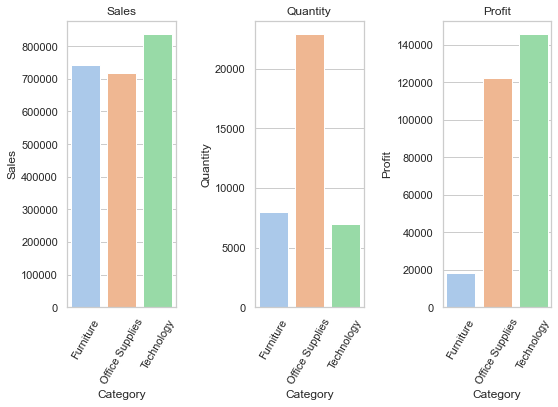

In [38]:
# Initialize figure
sns.set_theme(style="whitegrid", palette="pastel")
figure, axis = plt.subplots(1, 3, figsize=(8, 5))

# Plot barplots
sales_plot = sns.barplot(x = category_analysis.index, y = category_analysis['Sales'], ax=axis[0])
quantity_plot = sns.barplot(x = category_analysis.index, y = category_analysis['Quantity'], ax=axis[1])
profit_plot = sns.barplot(x = category_analysis.index, y = category_analysis['Profit'], ax = axis[2])

# Titles
sales_plot.set(title = 'Sales')
quantity_plot.set(title = 'Quantity')
profit_plot.set(title = 'Profit')

# Set spacing between plots
figure.tight_layout()

# Rotate lables
plt.setp(sales_plot.get_xticklabels(), rotation=60)
plt.setp(quantity_plot.get_xticklabels(), rotation=60)
plt.setp(profit_plot.get_xticklabels(), rotation=60)

### 2. What are the best selling and most profitable by sub-category?

In [40]:
# Grouping sub-category
subcat_analysis = df.groupby(df['Sub-Category'])[['Sales', 'Profit']].sum()

In [64]:
# Sort value by sales
subcat_sales = pd.DataFrame(subcat_analysis.sort_values('Sales', ascending = False))
subcat_sales

,Sales,Profit
Sub-Category,,
Phones,330007.0540,44515.7306
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Tables,206965.5320,-17725.4811
Binders,203409.1690,30228.0003
Machines,189238.6310,3384.7569
Accessories,167380.3180,41936.6357
Copiers,149528.0300,55617.8249
Bookcases,114879.9963,-3472.5560


In [43]:
# Sort value by Profit
subcat_profit = pd.DataFrame(subcat_analysis.sort_values('Profit', ascending = False))
subcat_profit

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78224.1420,33944.2395
Binders,203409.1690,30228.0003
Chairs,327777.7610,26567.1278
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91683.0240,13052.7230


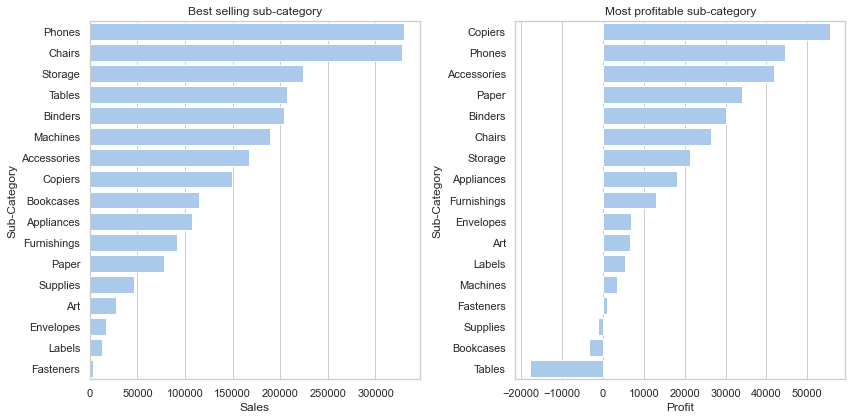

In [77]:
# Initialize figure
sns.set_theme(style="whitegrid", palette="pastel")
figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plot the best selling sub-catefory
subcat1 = sns.barplot(data=subcat_sales, x=subcat_sales['Sales'], y=subcat_sales.index, color='b', ax=axis[0])
subcat1.set(title='Best selling sub-category')

# Plot the most profitable sub-catefory
subcat2 = sns.barplot(data=subcat_profit, x=subcat_profit['Profit'], y=subcat_profit.index, color='b', ax=axis[1])
subcat2.set(title='Most profitable sub-category')

# Set spacing between plots
figure.tight_layout()

plt.show()


### 3. Which is the top selling sub-category items?

In [80]:
# Grouping and sort quantity of sub-category
subcat_quantity = pd.DataFrame(df.groupby(df['Sub-Category'])[['Quantity']].sum().sort_values('Quantity', ascending = False))
subcat_quantity

,Quantity
Sub-Category,
Binders,5971
Paper,5144
Furnishings,3560
Phones,3289
Storage,3158
Art,2996
Accessories,2976
Chairs,2351
Appliances,1729


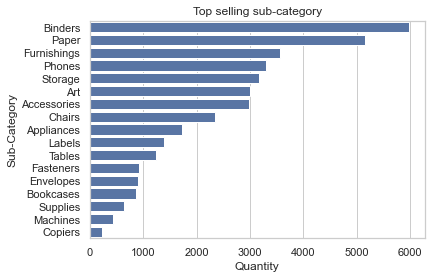

In [112]:
# Plot for top selling sub-category
sns.set_theme(style="whitegrid")
quantity_plot = sns.barplot(data=subcat_quantity, x=subcat_quantity['Quantity'], y=subcat_quantity.index, color='b')
quantity_plot.set(title='Top selling sub-category')
plt.show()

### 4. Which customer segment is most profitable?

In [113]:
segment_analysis = pd.DataFrame(df.groupby(df['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


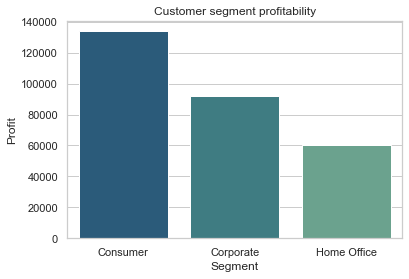

In [131]:
# Plot the barplot
sns.set_theme(style="whitegrid")
segment_plot = sns.barplot(data=segment_analysis, x=segment_analysis.index, y='Profit', palette='crest_r')
segment_plot.set(title='Customer segment profitability')
plt.show()

### 5. Which is the preferred ship mode?

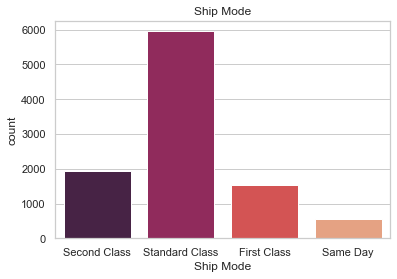

In [141]:
# Plot shipment mode
sns.set_theme(style="whitegrid")
sns.countplot(df['Ship Mode'], palette='rocket')
plt.title('Ship Mode')
plt.show()

### 6. Which region is most profitable?

In [143]:
region_analysis = pd.DataFrame(df.groupby(['Region'])['Profit'].sum())
region_analysis

,Profit
Region,
Central,39655.8752
East,91506.3092
South,46749.4303
West,108329.8079


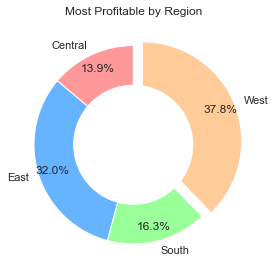

In [160]:
# Explsion
explode = (0,0,0,0.1)

# Colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Plot Pie Chart
plt.pie(region_analysis['Profit'], labels=region_analysis.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode,colors = colors)
plt.title("Most Profitable by Region")

# Draw circle
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

### 7. Which city has the highest number of sales?

In [202]:
# Top 10 cities
city_sales = pd.DataFrame(df.groupby(['City'])['Sales', 'Quantity'].sum().sort_values('Sales',ascending = False))
top10 = pd.DataFrame(city_sales[:10])
top10

,Sales,Quantity
City,,
New York City,256319.0410,3413
Los Angeles,175831.9010,2876
Seattle,119460.2820,1578
San Francisco,112577.1720,1920
Philadelphia,109061.4610,1978
Houston,64441.2564,1460
Chicago,48535.9770,1129
San Diego,47521.0290,670
Jacksonville,44713.1830,429


In [210]:
# Bottom 10 cites
bottom10 = pd.DataFrame(city_sales[-10:])
bottom10

,Sales,Quantity
City,,
Missouri City,6.370,7
Keller,6.000,2
Layton,4.960,4
Springdale,4.300,2
San Luis Obispo,3.620,2
Ormond Beach,2.808,3
Pensacola,2.214,3
Jupiter,2.064,1
Elyria,1.824,1


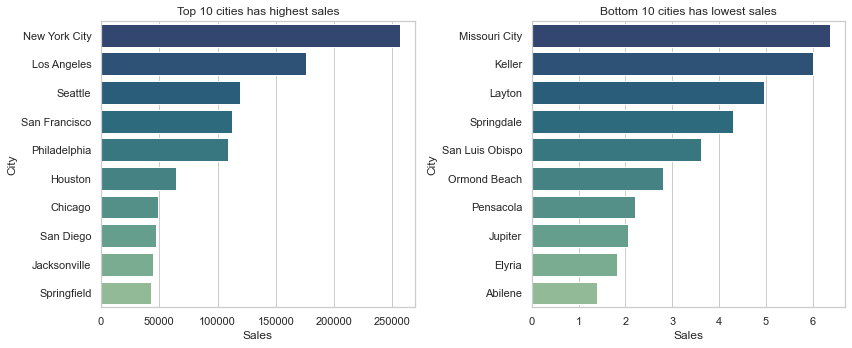

In [214]:
# Initialize figure
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 2, figsize=(12, 5))

# Plot top 10 cities
top10_plot = sns.barplot(data=top10, x=top10['Sales'], y=top10.index, palette='crest_r', ax=axis[0])
top10_plot.set(title='Top 10 cities has highest sales')


# Plot the most profitable sub-catefory
bottom10_plot = sns.barplot(data=bottom10, x=bottom10['Sales'], y=bottom10.index, palette='crest_r',ax=axis[1])
bottom10_plot.set(title='Bottom 10 cities has lowest sales')

# Set spacing between plots
figure.tight_layout()

plt.show()
